# MUDBENCS CTD Data Visualization

This notebook allows the visualization of CTD data from Seabird .cnv files that are acquired by the Walton Smith CTD data system. 

First we import important processing packages, including the functions unique to this data set which are in the package MUDBENCS_calcs of this repository. 

In [15]:
#Import packages

from seabird.cnv import fCNV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MUDBENCS_calcs as MB
from matplotlib.patches import Polygon

dest_dir = r'C:\Users\beros\Box\UDrive_brosenheim\My_Documents\Research\Seagoing Expeditions\CHEM-OCE Guianas Mudbanks 2020\Expedition prep\MUDBENCS\CTD_Data'


## CTD Data
Once the packages are imported, take a look at CTD data structure. Both .cnv files and .bl files are included in the respository named by the convention established previous to our expedition (for example `WS23139_STN05_04CTD.cnv`). You simply have to refer to the sequential CTD number (`05CDT`, for example, in single quotes) as the first variable of the function below. The function `load_CTD_data` provides you with a choice to plot one or more variables in a profile (vertical plot with water depth as the independent variable on the y-axis, and a list of variables separated by commas and within square brackets) in the x-axis or axes. The output of the function includes 4 different dataframes (`down_df`, the downcast data which are undisturbed by the CTD traveling through the water column, `up_df`, the upcast data during which the bottles are fired, `bot_avgs`, the average downcast data for every variable over the range of depths incured during bottle firings of all bottles, and `bot_stds`, the same as `bot_avgs`, but standard deviations instead of averages) which can all be saved as .csv files (second cell below) in the directory of your choice. This provides you with a chance to analyze the data using other platforms. The output variable `ax` allows you some modification permissions for the profile plot if you chose to include that in the function call, and you can also save the plot to a directory of your choice. 

The profile coordinates are latitude: 2.6775, and longitude: -48.2575, collected at  Oct 22 2003  14:24:54
Data types available are:  ['DEPTH', 'CNDC', 'density', 'flSP', 'wetCDOM', 'flECO-AFL', 'sbeox0Mg/L', 'sbeox0PS', 'par', 'PSAL', 'TEMP', 'flag']
Upcast data selected!


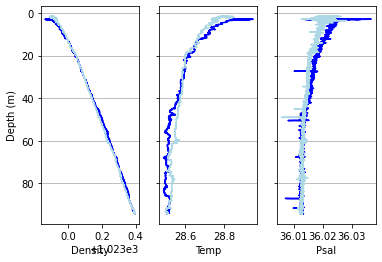

In [5]:
#Explore individual CTD casts using the sequential CTD number. The output variables are the downcast and upcast dataframes,
#bottle depth averages and standard deviations dataframes, and the axes onto which you plot the data if you chose to do so.
#You can save the dataframes as .csv files and you can save the graphical files to any specified directory. 

#Note that the default DEBUG variable is set to False, but you can change that to True to see functions reporting their 
#debugging data.

#You operate this by changing the first variable to the CTD cast of your choice, and you can change the key word arguments
#as well (variables, plot_data, direction) which all correspond to whether you want to plot the data or not. IF YOU WISH
#TO CHANGE VARIABLES TO BE PLOTTED, MAKE SURE THEY MATCH THE DATA TYPES AVAILABLE OUTPUT EXACTLY OR ELSE YOU WILL GET
#A 'KEY ERROR'!

#To use upcast values instead of downcast, add keyword argument "up_cast_only=True" and a comma after direction
#argument to load_CTD_data function below.

MB.DEBUG = False

directory = r'C:\Users\brosenheim\Box\UDrive_brosenheim\My_Documents\Research\Seagoing Expeditions\CHEM-OCE Guianas Mudbanks 2020\Expedition prep\MUDBENCS\CTD_Data\Processed Bottle Data'

down_df, up_df, bot_avgs, bot_stds, ax = MB.load_CTD_data(
    '02CTD', #Change this for different CTD casts
    variables=['density', 'TEMP', 'PSAL'],   #Change variables to plot here. Default shown (argument optional)
    plot_data=True, #Change to False to suppress profile plots. True is default (argument optional)
    direction='both',    #Plot downcast, upcast, or both (down, up, both). Both is default (argument optional)
    up_cast_only=True
)


In [6]:
#Save .csv files with all bottle depth averages from upcasts only. 

CTD_list = [
    '01CTD',
    '02CTD',
    '04CTD',
    '05CTD',
    '06CTD',
    '07CTD',
    '08CTD',
    '10CTD',
    '13CTD',
    '14CTD',
    '16CTD',
    '17CTD',
    '20CTD'
]

for ctd in CTD_list:
    print('Analyzing CTD cast: ', ctd)
    down_df, up_df, bot_avgs, bot_stds, ax = MB.load_CTD_data(
        ctd, #Change this for different CTD casts
        variables=['density', 'TEMP', 'PSAL'],   #Change variables to plot here. Default shown (argument optional)
        plot_data=False, #Change to False to suppress profile plots. True is default (argument optional)
        direction='both',    #Plot downcast, upcast, or both (down, up, both). Both is default (argument optional)
        up_cast_only=False
    )
    #bot_avgs.to_csv(directory+'/'+ctd+'_avgs.csv')
    #bot_stds.to_csv(directory+'/'+ctd+'_stds.csv')
    

Analyzing CTD cast:  01CTD
The profile coordinates are latitude: 2.6740, and longitude: -48.2633, collected at  Oct 22 2003  13:26:47
Data types available are:  ['DEPTH', 'CNDC', 'density', 'flSP', 'wetCDOM', 'flECO-AFL', 'sbeox0Mg/L', 'sbeox0PS', 'par', 'PSAL', 'TEMP', 'flag']
Nans present in bottle  3 . Stretching depth range by 3%.
Analyzing CTD cast:  02CTD
The profile coordinates are latitude: 2.6775, and longitude: -48.2575, collected at  Oct 22 2003  14:24:54
Data types available are:  ['DEPTH', 'CNDC', 'density', 'flSP', 'wetCDOM', 'flECO-AFL', 'sbeox0Mg/L', 'sbeox0PS', 'par', 'PSAL', 'TEMP', 'flag']
Nans present in bottle  1 . Stretching depth range by 3%.
Nans present in bottle  11 . Stretching depth range by 3%.
Nans still present in bottle  11 . Using upcast data instead.
Nans present in bottle  12 . Stretching depth range by 3%.
Nans still present in bottle  12 . Using upcast data instead.
Analyzing CTD cast:  04CTD
The profile coordinates are latitude: 1.6102, and longitu

In [7]:
#Investigate the bottle averages and save the averages if you want. This displays the averages, but you can look at the 
#standard deviations simply by changing the name of the variable in the print call. 
print(bot_avgs)

#bot_avgs.to_csv(r'C:\Users\MyName\MyDirectory\10CTD_Avgs.csv')



                          0
0                 14.518634
1                   5.70407
2                 1023.4639
3                   0.12237
4                110.191315
..                      ...
163                 36.0587
164               27.355014
165                     0.0
166                    12.0
167  Actual Downcast Values

[168 rows x 1 columns]


### Multiple Profiles

**Run this cell only if you want to generate vertical profiles for every station in CTD_list! It takes a while and generates a lot of graphics, so you can also skip it!**

Now that we can plot profiles from multiple variables at one station, we can use the combination of casts and variables to plot profiles for all stations and save them to a directory. Below, we manually create a list of stations for which we would like to save a profile and then we run a loop through that list to plot the profiles, create a unique and logical file name, and save the file to a directory.

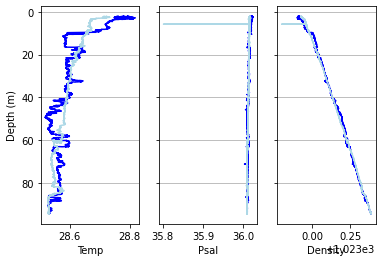

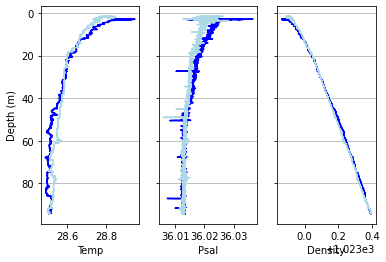

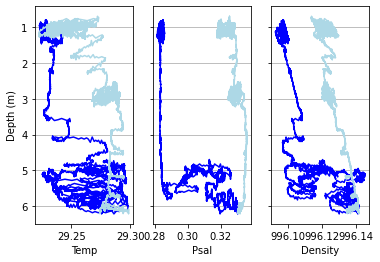

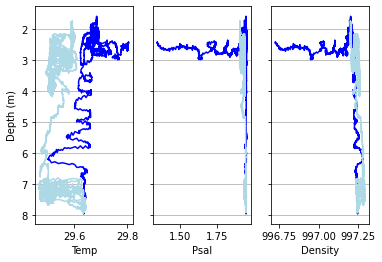

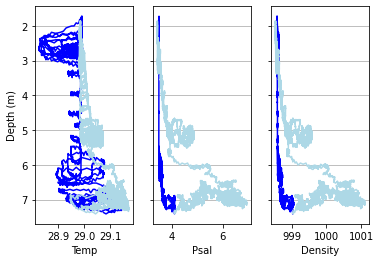

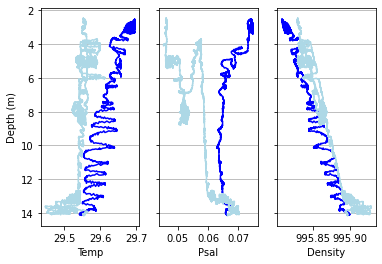

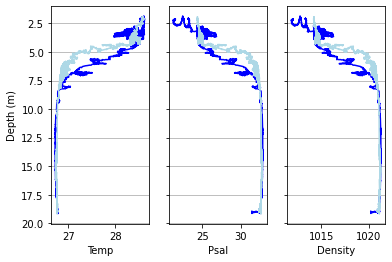

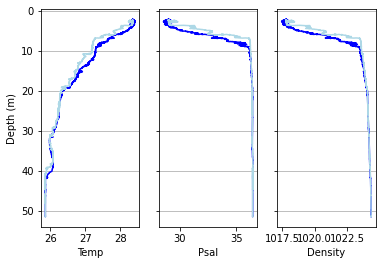

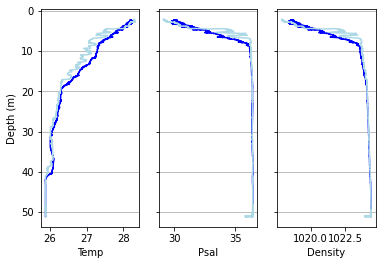

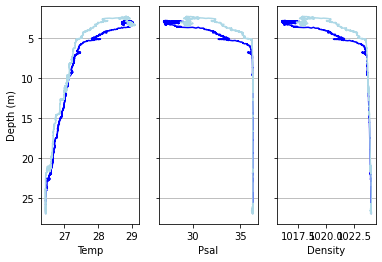

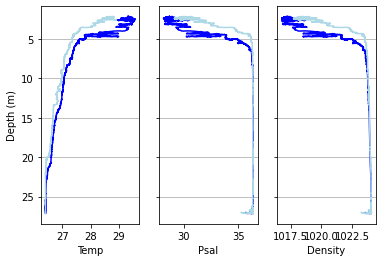

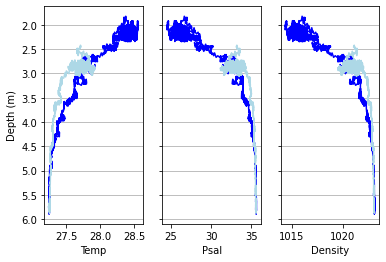

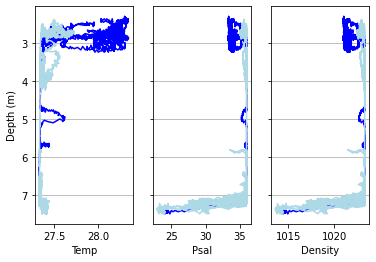

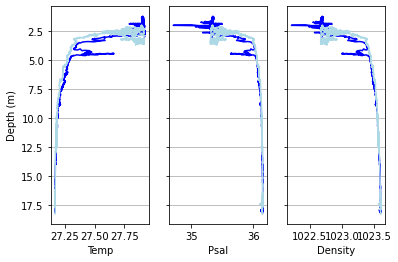

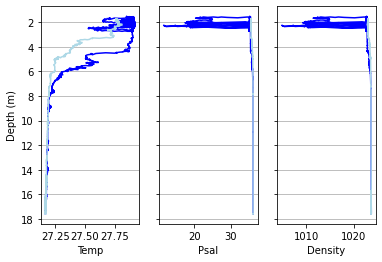

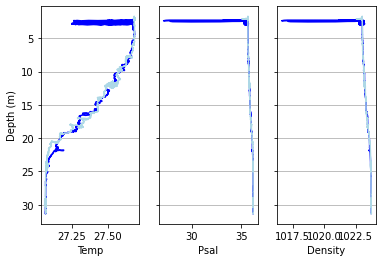

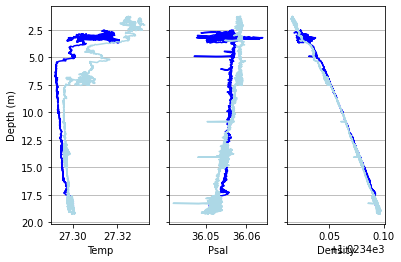

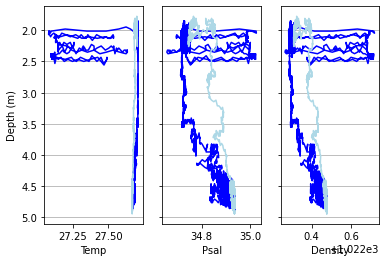

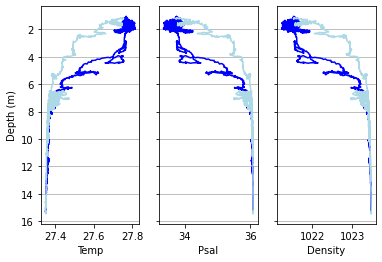

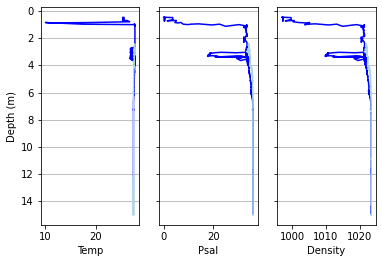

In [8]:
#Create list of stations and sequential CTDs
CTD_list = [
    'STN02_01CTD',
    'STN02_02CTD',
    'STN04_03CTD',
    'STN05_04CTD',
    'STN06_05CTD',
    'STN07_06CTD',
    'STN08_07CTD',
    'STN10_08CTD',
    'STN10_09CTD',
    'STN11_10CTD',
    'STN11_11CTD',
    'STN12_12CTD',
    'STN15_13CTD',
    'STN16_14CTD',
    'STN16_15CTD',
    'STN17_16CTD',
    'STN18_17CTD',
    'STN20_18CTD',
    'STN21_19CTD',
    'STN21_20CTD'
]

#Specify Directory:
directory = 'C:/Users/Name/MyDirectory/CTD_Data'

#Iterate through the list, processing and saving files
for z, ctd in enumerate(CTD_list):
    filein = 'WS23139_'+ctd+'.cnv'      #Construct filename for cnv files (inputs)
    dat_nc = fCNV(filein)
    down_df, up_df, bottom, ax = MB.plot_profile(dat_nc, [ 'TEMP', 'PSAL', 'density'], direction='both')
    fileout = 'WS23139_'+ctd+'Temp_Sal_Rho.svg'
    #plt.savefig(directory+'/'+fileout, dpi=300)
    
    

## Read Along Track Data
Along with CTD data, the WS23-139 cruise had along track data. Here we read those data into this workbook and plot some of the data. 

In [9]:
#Read in the along track data. Set the variable MB.DEBUG to True to print the colunm names. 
MB.DEBUG = True
AT_data_df = MB.read_along_track_data('Both')
print(AT_data_df.shape)

c:\Users\beros\Box\UDrive_brosenheim\My_Documents\PyCode\MUDBENCS\MUDBENCS_calcs.py:243: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  AT_data_df = pd.read_csv(


(Index(['Date_Time', 'GPS1 Lat', 'Dir', 'Lon', 'Dir.1', 'SOG Knots',
       'COG Deg. True', 'Lat Dec. Deg.', 'Lon Dec. Deg.', 'GPS2 Lat', 'Dir.2',
       'Lon.1', 'Dir.3', 'SOG Knots.1', 'COG Deg. True.1', 'Lat Dec. Deg..1',
       'Lon Dec. Deg..1', 'Gyro', 'Water Speed F/A Spd. Knots',
       'P/S Spd. Knots', 'PIR w/m^2', 'PSP w/m^2', 'TUV w/m^2',
       'Rain Gauge Cond. Code', 'Inst. Precip. mm/hr', 'Accum. Precip. mm',
       'Depth Feet', 'Meters', 'Fathoms', 'Fluorometer Reading Volts', 'Gain',
       'DisOrgMat Reading Volts', 'Gain.1', 'SBTemp Degrees C', 'POSMV Lat',
       'Dir.4', 'Lon.2', 'Dir.5', 'SOG Knots.2', 'COG Degrees T',
       'Lat Dec. Deg..2', 'Lon Dec. Deg..2', 'POSMV Heading Degrees T',
       'RM Young Barometer mb', 'Stbd RM Young Winds Rel. Wind Spd. Knots',
       'Rel. Wind Dir. Degrees', 'True Wind Spd. Knots',
       'True Wind Dir. Degrees', 'Port RM Young Met Air Temp. Degrees C',
       'Rel. Humid. %', 'Baro. Press. mb', 'MicroTSG1 Temperature Deg

## Map Along-track Data
The following cell allows you to plot any of the variables represented by the columns in the DataFrame resulting from read_along_track_data. Default variable is `' Salinity PSU'` - if you enter a non-existent variable or misspell the variable, it will return to Salinity. Additionally, the map axes are returned so you can  add points or other information (vector fields, annotations, images, etc.). Below, in several cells, you can see different keyword arguments used to add country names (`list_countries=True`), to add stations (`add_stations=True`, and `stationslist=[list]`), and to add an observed frontal boundary (`add_front=True`). Arguments for these keyword arguments are generally boolean (True or False), with the exception of `stationslist`. There is a default for the list of stations (plotting all stations with over-the-side deployments), but you can also add your own list of stations to plot using a list of station numbers in the format `'stnXX'` where XX is the two-digit sequential station number. These keyword arguments are provided for flexibility in visualizing the data.

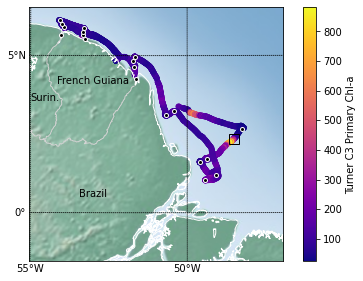

In [10]:
#plt.xkcd()         #Uncomment to make a plot look like a comic drawing.
#plt.rcdefaults()    #Use this line to restore to normal plotting parameters - these commands can be toggled at any 
                    #time to make comic drawing style plots and to revert back. 
MB.DEBUG = False
#Plot a map of salinity with all OTS stations by specifying the kwarg for adding stations, but not a unique stationslist.
m = MB.MUDBENCS_map(AT_data_df, 'Turner C3 Primary Chl-a', label_countries=True, add_stations=True, add_front=True)


plt.tight_layout()
#plt.savefig(dest_dir + '/Maps/Chl-a_front_w_stations.svg', dpi=600)

In [11]:
#Syntax for inspecting station coordinates, offered as an example using both station name and station number:
stations=pd.read_csv('MUDBENCS_Stations.csv')
print('Stations by station name (syntax below):')
print(stations[stations['Station Name'].str.contains('Oyapock')])
print('\n')
print('Stations by station number (syntax below):')
print(stations[stations['Station Number']=='stn06'])

#Note: you can also open the .csv file in a csv viewer like Excel.

Stations by station name (syntax below):
   Station Number     Station Name       Lat        Lon
10          stn10    Oyapock Outer  4.966783 -51.672862
11          stn11      Oyapock Mid  4.827228 -51.721250
12          stn12    Oyapock Inner  4.623492 -51.682839
13          stn13  Oyapock Estuary  4.250210 -51.628320


Stations by station number (syntax below):
  Station Number  Station Name       Lat        Lon
5          stn06  Amazon Outer  1.198867 -49.094323


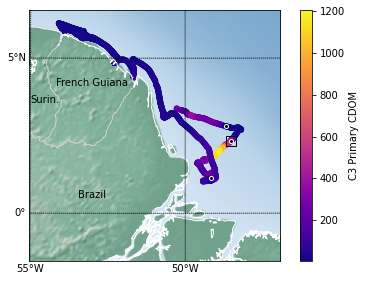

In [12]:
test_stations = ['stn01', 'stn03', 'stn6_TurbEdge']
m = MB.MUDBENCS_map(AT_data_df, ' C3 Primary CDOM', label_countries=True, add_stations=True, stationslist=test_stations, add_front=True)

plt.tight_layout()
#plt.savefig(dest_dir + '/Maps/CDOM_tests_and_front.svg', dpi=300)

## Calculate the average position and approximate motion on-station

Using the read_along_track_data function, you can get on-station data by inserting a manual begin_end list of strings. Here, the calculation of the average lat and lon for Station 02 (Seawater Endmember) is shown. More complex calculations can be carried out for each station, but this simple one uses the pandas functions operable on dataframes. The values in square brackets and single quotes are the names of columns of data, and they must match exactly entries from the list of column names. You can see the column names by changing MB.DEBUG to True. 

In [13]:
MB.DEBUG = False
Station_data_df = MB.read_along_track_data(['16 Jun 2023 18:35', '16 Jun 2023 20:15'])
mean_lat = Station_data_df['Lat Dec. Deg.'].mean()
mean_lon = Station_data_df['Lon Dec. Deg.'].mean()
std_lat = Station_data_df['Lat Dec. Deg.'].std()
std_lon = Station_data_df['Lon Dec. Deg.'].std()

print('Mean Lat (\u00B1std) = %.4f (\u00B1%.3f)\N{DEGREE SIGN}N, Mean Lon (\u00B1std) = %.4f (\u00B1%.3f)\N{DEGREE SIGN}W ' % (mean_lat, std_lat, mean_lon, std_lon))

Mean Lat (±std) = 5.8863 (±0.019)°N, Mean Lon (±std) = -53.9354 (±0.017)°W 


c:\Users\beros\Box\UDrive_brosenheim\My_Documents\PyCode\MUDBENCS\MUDBENCS_calcs.py:243: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  AT_data_df = pd.read_csv(


## Nutrients Data

The cells below load and process the nutrients data. Nutrients data are compared to the data from Subramaniam et al. 2007, which were taken from the plume. 

Values for all returned DataFrames in micromoles per liter!
['11', '08', '07', '17', '15', '21', '20', '10', '18', '16', '12', '04']


c:\Users\beros\Box\UDrive_brosenheim\My_Documents\PyCode\MUDBENCS\MUDBENCS_calcs.py:785: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nuts_df['Lat Dec. Deg.'][n] = stations['Lat'].loc[mask]
c:\Users\beros\Box\UDrive_brosenheim\My_Documents\

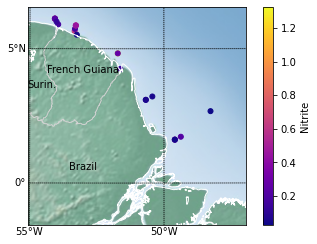

In [18]:
nuts_df, surface_nuts_df, MC_tops_df, QC_df, reference_df, RMNS_df, LOD_df = MB.load_nuts()
Subra_df = MB.load_Subramaniam_nuts()

variable = 'Nitrite'


MB_map = MB.MUDBENCS_map(nuts_df, variable, label_countries=True, add_stations=False)

    
plt.savefig(dest_dir + '/Maps/nutrients_' + variable + '.svg', dpi=600)

Index(['Station', 'P', 'N+N', 'Si Acid', 'Nitrite', 'Station Number',
       'Station Type', 'Lat Dec. Deg.', 'Lon Dec. Deg.'],
      dtype='object')


C:\Users\beros\AppData\Local\Temp/ipykernel_18732/1255019162.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nuts_df['Lat Dec. Deg.'][n] = stations['Lat'].loc[mask]
C:\Users\beros\AppData\Local\Temp/ipykernel_18732/1255019162.py:19: Set

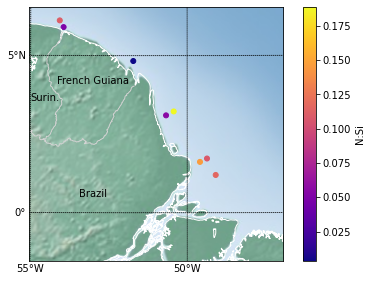

In [22]:
#Aggregate and map the means of all nutrients data no matter type or depth. 

print(nuts_df.columns)
stations = pd.read_csv('MUDBENCS_Stations.csv')
#print(stations.columns)

stations_split = [station.split(' ')[1] if ('MUDBENCS' in station) else station.split('-')[1][0:2] for station in nuts_df['Station']]
station_type = ['Fish Surface' if ('MUDBENCS' in station) else 'Other' for station in nuts_df['Station']]
stations_corr = ['0'+station if len(station)<2 else station for station in stations_split]
#print(stations_corr)

nuts_df['Station Number'] = stations_corr
nuts_df['Station Type'] = station_type
nuts_df['Lat Dec. Deg.'] = np.nan
nuts_df['Lon Dec. Deg.'] = np.nan
for n, row in nuts_df.iterrows():
    mask = [True if (row['Station Number'] in number) else False for number in stations['Station Number']]
    #print(stations.loc[mask])
    nuts_df['Lat Dec. Deg.'][n] = stations['Lat'].loc[mask]
    nuts_df['Lon Dec. Deg.'][n] = stations['Lon'].loc[mask]

#average all nutrient data from each station agnostic of type or depth
station_nuts = nuts_df.groupby('Station Number').mean(numeric_only=True)
#print(station_nuts.head())

#Slice only surface nutrient data
surface_nuts = nuts_df[nuts_df['Station Type']=='Fish Surface']
N_to_P = [N/P for N,P in zip(surface_nuts['N+N'], surface_nuts['P'])]
N_to_Si = [N/Si for N,Si in zip(surface_nuts['N+N'], surface_nuts['Si Acid'])]
surface_nuts['N:P'] = N_to_P
surface_nuts['N:Si'] = N_to_Si

nuts_map = MB.MUDBENCS_map(surface_nuts, 'N:Si', label_countries=True, add_stations=False, add_front=False)
plt.tight_layout()
plt.savefig(dest_dir + '/Maps/MUDBENCS_surf_N_to_Si.svg', dpi=600)

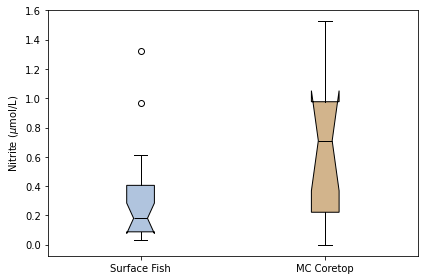

In [26]:
box_colors = ['lightsteelblue', 'tan']
variable = 'Nitrite'
nuts_dict = {'Surface Fish': nuts_df[variable].dropna(), 'MC Coretop': MC_tops_df[variable]}

fig, ax = plt.subplots()
bp = ax.boxplot(nuts_dict.values(), notch=True, patch_artist=True)
for box, median in zip(bp, bp['medians']):
    for patch, color in zip(bp['boxes'], box_colors):
        patch.set_facecolor(color)
    median.set_color('k')
ax.set_xticklabels(nuts_dict.keys())
ax.set(ylabel=variable+r' ($\mu$mol/L)')

plt.tight_layout()
#plt.savefig(dest_dir+'/'+variable+'_boxplot_Surf_vs_Coretop.svg', dpi=600)

              Station      P     N+N  Si Acid  Nitrite Station Number  \
0               STN11  0.290   5.900   38.585    1.525             11   
1   STN8 SW INTERFACE  0.260   8.140   19.365    0.000             08   
2         STN7 MC06 B  0.470  11.160  140.350    0.000             07   
3        STN17 SW INT  1.180  12.185  100.115    1.115             17   
4               STN15  1.485   5.475   48.770    0.150             15   
5               STN21  0.285   6.040   25.185    0.730             21   
6          STN20 (2S)  0.145  10.595   27.320    1.255             20   
7               STN10  1.010   3.830   43.965    0.690             10   
8               STN18  1.045   5.985   40.775    0.410             18   
9               STN16  0.855   6.205   26.870    0.865             16   
10              STN12  1.000  36.320   22.640    0.245             12   
11               STN4  0.235  20.495  105.005    0.930             04   

    Lat Dec. Deg.  Lon Dec. Deg.  
0        4.8272

<ipython-input-35-74a963daf810>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MC_tops_df['Lat Dec. Deg.'][n] = stations['Lat'].loc[mask]
<ipython-input-35-74a963daf810>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  MC_tops_df['Lat Dec. Deg.'][n] = stations['Lat'].loc[mask]
<ipython-input-35-74a963daf810>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MC_tops_df['Lon Dec. Deg.'][n] = stations['Lon'].loc[mask]
<ipython-input-35-74a963daf810>:17: FutureWarning: Calling float on a single element Series is deprecate

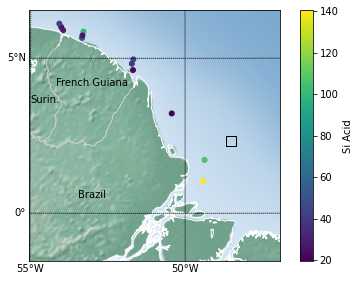

In [ ]:
#Add coordinates data to the MC core tops nutrients 
print(MC_tops_df)
stations_split = [station.split(' ')[0] for station in MC_tops_df['Station']]
print(stations_split)
stations_split = [station.split('N')[1] for station in stations_split]
stations_corr = ['0'+station if len(station)<2 else station for station in stations_split]
print(stations_split)

MC_tops_df['Station Number'] = stations_corr

MC_tops_df['Lat Dec. Deg.'] = np.nan
MC_tops_df['Lon Dec. Deg.'] = np.nan
for n, row in MC_tops_df.iterrows():
    mask = [True if (row['Station Number'] in number) else False for number in stations['Station Number']]
    #print(stations.loc[mask])
    MC_tops_df['Lat Dec. Deg.'][n] = stations['Lat'].loc[mask]
    MC_tops_df['Lon Dec. Deg.'][n] = stations['Lon'].loc[mask]

variable = 'Si Acid'
pws_map = MB.MUDBENCS_map(MC_tops_df, variable, colormap='viridis', label_countries=True, add_stations=False, add_front=True)
plt.tight_layout()
#plt.savefig(directory+'/MUDBENCS_pw_'+variable+'.svg', dpi=600)


In [ ]:
print((Subra_df['Fe_d (nM)'].sort_values(ascending=False)))
print(Subra_df[['Fe_d (nM)', 'Lat Dec. Deg.', 'Lon Dec. Deg.', 'Station_Type']].loc[Subra_df['Fe_d (nM)']>=4])

89    11.759642
91     4.837741
31     4.240000
39     4.199365
61     3.470000
        ...    
82          NaN
83          NaN
84          NaN
85          NaN
88          NaN
Name: Fe_d (nM), Length: 82, dtype: float64
    Fe_d (nM)  Lat Dec. Deg.  Lon Dec. Deg. Station_Type
31   4.240000         12.508     -56.014667   Mesohaline
39   4.199365         10.350     -55.100000   Mesohaline
89  11.759642         10.780     -52.280000      Oceanic
91   4.837741          7.140     -51.500000      Oceanic


## Make plots for France and Brazil reports
The following cell takes time stamps from station log data and uses them to depict when we crossed international boundaries. This is useful for created plots that contain, for instance, only France's data. The use of this cell and any copies of it are specified by the reporting requirements of individual states into whose domestic waters we sailed. 

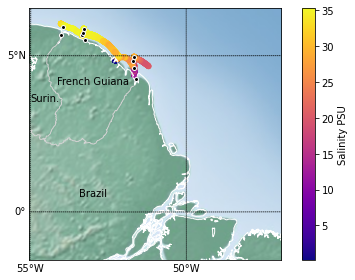

In [ ]:
MB.DEBUG = False
enter_france = pd.to_datetime('2023-06-11 13:30:00')
enter_suriname = pd.to_datetime('2023-06-16 19:00:00')

#Remove Brazil data from compilation of both legs, using station log dates and times:
post_ouca_data_df = AT_data_df.loc[(AT_data_df['Date_Time']>enter_france)]
#Remove first window when ship was in Suriname (Maroni Outer)
leave_Iracoubo = pd.to_datetime('2023-06-15 23:59:00')
reenter_France = pd.to_datetime('2023-06-16 11:00:00')
reenter_suriname = pd.to_datetime('2023-06-16 10:00:00')
transit_back = pd.to_datetime('2023-06-16 22:00:00')
France_MaroniMid_df = post_ouca_data_df.loc[~((post_ouca_data_df['Date_Time']>leave_Iracoubo) & (post_ouca_data_df['Date_Time']<reenter_France)) ]
France_only_df = France_MaroniMid_df.loc[~((France_MaroniMid_df['Date_Time']>reenter_suriname) & (France_MaroniMid_df['Date_Time']<transit_back))]
France_Stations = ['stn10', 'stn11', 'stn12', 'stn13', 'stn14', 'stn15', 'stn16', 'stn17', 'stn19', 'stn20']
france_map = MB.MUDBENCS_map(France_only_df, ' Salinity PSU', label_countries=True, add_stations=True, stationslist=France_Stations)
plt.tight_layout()
#plt.savefig(r'C:\Users\beros\Box\UDrive_brosenheim\My_Documents\Research\Seagoing Expeditions\CHEM-OCE Guianas Mudbanks 2020\Expedition prep\State Docs\Data_Files_for_France\France_stations_salinity_map.svg')
#France_only_df.to_csv(r'C:\Users\beros\Box\UDrive_brosenheim\My_Documents\Research\Seagoing Expeditions\CHEM-OCE Guianas Mudbanks 2020\Expedition prep\State Docs\Data_Files_for_France\France_Along_Track.csv')

In [ ]:
#Print NetCDF files for CTD data for French stations
import glob

#Make list of .cnv files
bottle_file_list = []
for file in glob.glob("*.cnv"):
    bottle_file_list.append(str(file))


#Create dictionaries from processed .cnv files

report_dir = 'C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/State Docs/Data_Files_for_France'
for name in bottle_file_list:
    for station in France_Stations:
        if station.upper() in name:
            print('...converting ', name.split('.')[0], ' to netCDF...')
            dat_nc = fCNV(name)
            dat_df = MB.cnv2df(dat_nc)
            #Save the dataframes:
            #dat_df.to_csv(report_dir+'/'+name+'.csv')
            print(dat_df.shape, ' ...shape of new df, now saved to directory.')

...converting  WS23139_STN10_08CTD  to netCDF...
(16058, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN10_09CTD  to netCDF...
(10066, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN11_10CTD  to netCDF...
(11271, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN11_11CTD  to netCDF...
(9250, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN12_12CTD  to netCDF...
(7366, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN15_13CTD  to netCDF...
(8782, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN16_14CTD  to netCDF...
(13136, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN16_15CTD  to netCDF...
(9495, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN17_16CTD  to netCDF...
(10454, 12)  ...shape of new df, now saved to directory.
...converting  WS23139_STN20_18CTD  to netCDF...
(